# Tidy Data

### Load required Tidyverse packages

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Load in Dataset "VADeaths"

In [12]:
data("VADeaths")
VADeaths

,Rural Male,Rural Female,Urban Male,Urban Female
50-54,11.7,8.7,15.4,8.4
55-59,18.1,11.7,24.3,13.6
60-64,26.9,20.3,37.0,19.3
65-69,41.0,30.9,54.6,35.1
70-74,66.0,54.3,71.1,50.0


### Convert to tibble and use mutate() function to move player names to its own column

In [13]:
VADeaths <- VADeaths %>%
  as_tibble() %>%
  mutate(Age = rownames(VADeaths))

VADeaths

Rural Male,Rural Female,Urban Male,Urban Female,Age
11.7,8.7,15.4,8.4,50-54
18.1,11.7,24.3,13.6,55-59
26.9,20.3,37.0,19.3,60-64
41.0,30.9,54.6,35.1,65-69
66.0,54.3,71.1,50.0,70-74


### Tidy up the Columns using the gather() function
- Rural/Urban and Male/Female 
- Gather values spread across columns into a single column, with the column names gathered into a "key" column
- Exclude Columns that don't need tobe gathered with a "minus" sign in gather() function
- Gather everything but the "age" Column


In [14]:
VADeaths <- VADeaths %>%
  gather(key = Key, value = Death_Rate, -Age)

VADeaths

Age,Key,Death_Rate
50-54,Rural Male,11.7
55-59,Rural Male,18.1
60-64,Rural Male,26.9
65-69,Rural Male,41.0
70-74,Rural Male,66.0
50-54,Rural Female,8.7
55-59,Rural Female,11.7
60-64,Rural Female,20.3
65-69,Rural Female,30.9
70-74,Rural Female,54.3


# Gather is also useful when displying data
- Using "Worldcup" Dataset from "faraway" package
- Plot the relationship between the time a player played and number of saves, tackles, and shots
- Using locally saved csv file

In [19]:
worldcup <- read_csv("Data/worldcup.csv")

Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


In [20]:
worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Player_Name = player_name)

head(worldcup)

Player_Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


### Using select() and gather() functions
- Select Position, Time, Shots, Tackles, Saves
- Exclude Position and Time to keep as separate Columns
- Gather Shots, Tackles and Saves
- key = Type, which are column names
- value = Number, which are observations in those columns

In [22]:
worldcup %>%
  select(Position, Time, Shots, Tackles, Saves) %>%
  gather(key = Type, value = Number, -Position, -Time) %>%
  sample_n(10)

Position,Time,Type,Number
Goalkeeper,450,Shots,0
Defender,2,Saves,0
Defender,270,Tackles,10
Defender,2,Shots,0
Forward,117,Tackles,0
Defender,180,Shots,0
Defender,270,Shots,1
Defender,540,Tackles,16
Defender,90,Saves,0
Midfielder,532,Tackles,7


### Plot using ggplo2

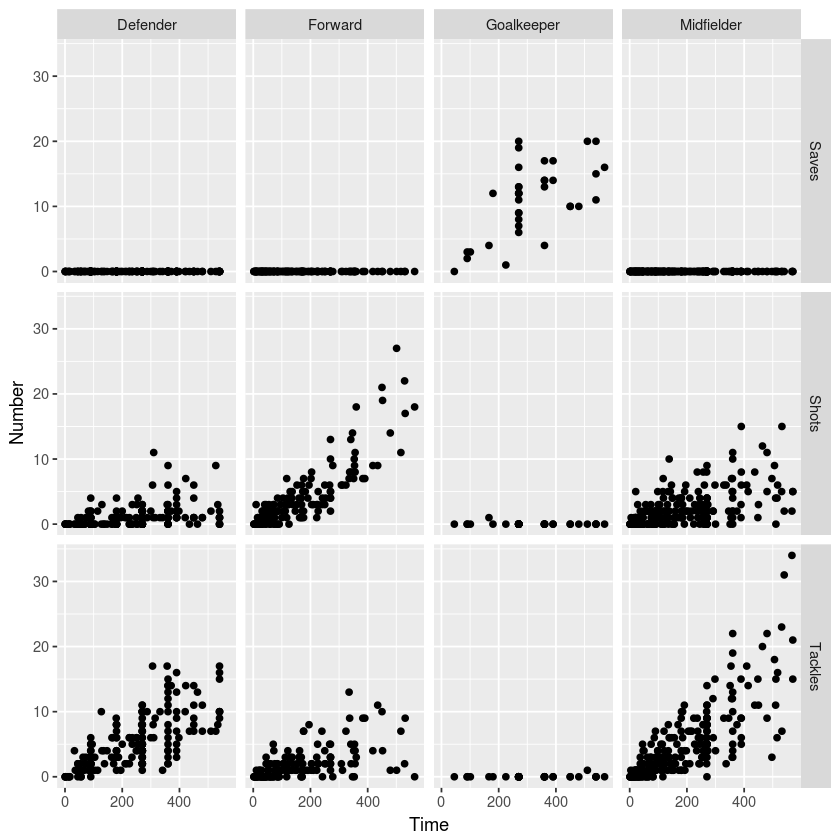

In [23]:
worldcup %>%
  select(Position, Time, Shots, Tackles, Saves) %>%
  gather(Type, Number, -Position, -Time) %>%
  ggplot(aes(x = Time, y = Number)) + 
  geom_point() + 
  facet_grid(Type ~ Position)